In [ ]:
import pandas as pd
import numpy as np

# Columns:
# - ID: Unique identifier
# - Date: Dates for transactions
# - Principal: Initial amount (e.g., investment or loan principal)
# - InterestRate: Random interest rates (as a percentage)
# - TimeYears: Duration of investment/loan in years



In [ ]:
df=pd.read_csv('/content/miniproject.csv')

# **Data Cleaning**

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)




Missing Values in Each Column:
Unnamed: 0      0
ID              0
Date            0
Principal       6
InterestRate    6
TimeYears       0
dtype: int64


In [ ]:
df.isnull()

,Unnamed: 0,ID,Date,Principal,InterestRate,TimeYears
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
100,False,False,False,False,False,False
101,False,False,False,False,False,False
102,False,False,False,False,False,False
103,False,False,False,False,False,False


In [ ]:
df.head(25)

,Unnamed: 0,ID,Date,Principal,InterestRate,TimeYears
0,0,T001,2022-01-02,8270.0,6.051191,17
1,1,T002,2022-01-09,1860.0,4.446342,2
2,2,T003,2022-01-16,6390.0,9.745409,1
3,3,T004,2022-01-23,6191.0,8.640224,16
4,4,T005,2022-01-30,6734.0,7.495566,12
5,5,T006,2022-02-06,NaN,3.123864,5
6,6,T007,2022-02-13,NaN,3.304615,5
7,7,T008,2022-02-20,NaN,1.363902,9
8,8,T009,2022-02-27,NaN,7.395966,9
9,9,T010,2022-03-06,NaN,1.998017,3


In [ ]:
df.describe()

,Unnamed: 0,Principal,InterestRate,TimeYears
count,105.000000,99.000000,99.000000,105.00000
mean,49.952381,5816.292929,5.236400,9.20000
std,28.573246,2621.417163,2.418227,6.09918
min,0.000000,1064.000000,1.004683,1.00000
25%,26.000000,3653.500000,3.188285,3.00000
50%,50.000000,6258.000000,5.030048,8.00000
75%,74.000000,8099.000000,7.262187,15.00000
max,99.000000,9996.000000,9.979664,19.00000


In [ ]:
# Fill missing values with column means
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Fill missing values in numeric columns with the column mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Verify if there are any missing values left
print("\nMissing Values After Cleaning:")
print(df.isnull().sum().sum())  # Total missing values in the dataset




Missing Values After Cleaning:
0


In [ ]:
df.head(10)

,Unnamed: 0,ID,Date,Principal,InterestRate,TimeYears
0,0,T001,2022-01-02,8270.000000,6.051191,17
1,1,T002,2022-01-09,1860.000000,4.446342,2
2,2,T003,2022-01-16,6390.000000,9.745409,1
3,3,T004,2022-01-23,6191.000000,8.640224,16
4,4,T005,2022-01-30,6734.000000,7.495566,12
5,5,T006,2022-02-06,5816.292929,3.123864,5
6,6,T007,2022-02-13,5816.292929,3.304615,5
7,7,T008,2022-02-20,5816.292929,1.363902,9
8,8,T009,2022-02-27,5816.292929,7.395966,9
9,9,T010,2022-03-06,5816.292929,1.998017,3


In [ ]:
# Identify string (object) type columns
string_columns = df.select_dtypes(include=['object']).columns



In [ ]:
#  Fill missing values with a specific value like "Unknown"
df[string_columns] = df[string_columns].fillna("Unknown")



In [ ]:
#Fill missing values with the most frequent value in each column
for col in string_columns:
    most_frequent_value = df[col].mode()[0]  # Get the most common value
    df[col].fillna(most_frequent_value, inplace=True)



<ipython-input-29-51933556a5a2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent_value, inplace=True)


In [ ]:
# Forward Fill or Backward Fill (choose based on context)
# Forward Fill
df[string_columns] = df[string_columns].fillna(method='ffill')



<ipython-input-30-d74a02171de2>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[string_columns] = df[string_columns].fillna(method='ffill')


In [ ]:
# Backward Fill
df[string_columns] = df[string_columns].fillna(method='bfill')



<ipython-input-31-17fe5702696c>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[string_columns] = df[string_columns].fillna(method='bfill')


In [ ]:
# Verify if all missing values in string columns are handled
print("\nMissing Values in String Columns After Cleaning:")
print(df[string_columns].isnull().sum())



Missing Values in String Columns After Cleaning:
ID      0
Date    0
dtype: int64


In [ ]:
# Remove duplicate rows if present
df.drop_duplicates(inplace=True)
print("\nNumber of Rows After Removing Duplicates:", len(df))



Number of Rows After Removing Duplicates: 100


In [ ]:
# Verify that no missing values remain
print("\nMissing Values After Cleaning:")
print(df.isnull().sum().sum())  # Total missing values in the dataset




Missing Values After Cleaning:
0


In [ ]:
# Calculate Simple Interest (SI = P * R * T / 100)
df["SimpleInterest"] = (
    df["Principal"] * df["InterestRate"] * df["TimeYears"] / 100
)



In [ ]:
# Calculate Compound Interest (CI = P * (1 + R/100)^T - P)
df["CompoundInterest"] = (
    df["Principal"] * ((1 +df["InterestRate"] / 100) ** df["TimeYears"]) - df["Principal"]
)

In [ ]:
df

,Unnamed: 0,ID,Date,Principal,InterestRate,TimeYears,SimpleInterest,CompoundInterest
0,0,T001,2022-01-02,8270.0,6.051191,17,8507.369192,14182.766049
1,1,T002,2022-01-09,1860.0,4.446342,2,165.403918,169.081129
2,2,T003,2022-01-16,6390.0,9.745409,1,622.731626,622.731626
3,3,T004,2022-01-23,6191.0,8.640224,16,8558.660700,17122.703505
4,4,T005,2022-01-30,6734.0,7.495566,12,6057.016723,9296.966481
...,...,...,...,...,...,...,...,...
100,83,T084,2023-08-06,3695.0,7.400346,2,546.885554,567.121265
101,53,T054,2023-01-08,2021.0,7.266738,15,2202.911763,3767.185607
102,70,T071,2023-05-07,5887.0,3.179439,3,561.520800,579.563225
103,45,T046,2022-11-13,8099.0,3.197130,14,3625.097482,4483.821981


In [ ]:
df.to_csv("mydata.csv")

In [ ]:
from google.colab import files
files.download("mydata.csv")

In [ ]:
df1=pd.read_csv('/content/mydata.csv')

# **Analyze the Difference Between SI and CI**

In [ ]:
# Create a column for the difference
df1['Difference (CI - SI)'] = df1['CompoundInterest'] - df1['SimpleInterest']

# Summary statistics for the difference
print("\nDifference (CI - SI) Statistics:")
print(df1['Difference (CI - SI)'].describe())




Difference (CI - SI) Statistics:
count    1.050000e+02
mean     1.405807e+03
std      2.672821e+03
min     -5.684342e-13
25%      3.564297e+01
50%      3.811233e+02
75%      1.477912e+03
max      1.562518e+04
Name: Difference (CI - SI), dtype: float64


In [ ]:
# Check cases where Compound Interest is significantly higher than Simple Interest
high_diff = df1[df1['Difference (CI - SI)'] > df1['Difference (CI - SI)'].mean()]
print("\nRecords with High CI-SI Difference:")
print(high_diff)



Records with High CI-SI Difference:
     Unnamed: 0    ID        Date  Principal  InterestRate  TimeYears  \
0             0  T001  2022-01-02     8270.0      6.051191         17   
3             3  T004  2022-01-23     6191.0      8.640224         16   
4             4  T005  2022-01-30     6734.0      7.495566         12   
8             8  T009  2022-02-27        NaN      7.395966          9   
10           10  T011  2022-03-13        NaN      4.954029         19   
12           12  T013  2022-03-27     7949.0      9.061872         16   
15           15  T016  2022-04-17     6051.0      7.259645         11   
20           20  T021  2022-05-22     7396.0           NaN          8   
22           22  T023  2022-06-05     3558.0           NaN         16   
24           24  T025  2022-06-19     3047.0           NaN         18   
29           29  T030  2022-07-24     5658.0      4.748590         16   
36           36  T037  2022-09-11     9838.0      6.829211         16   
42           4

# **Calculate Growth Factor for CI Over SI**

The growth factor helps us understand how much more beneficial Compound Interest is compared to Simple Interest as the investment grows over time. The longer the time period and the higher the interest rate, the larger the growth factor, which makes Compound Interest increasingly advantageous.

In [ ]:
# Calculate growth factor as (CI / SI) for rows where SI is not zero
df1['Growth Factor (CI/SI)'] = df1['CompoundInterest'] / df1['SimpleInterest']

# Handle divide-by-zero errors gracefully
df1['Growth Factor (CI/SI)'].replace([float('inf'), -float('inf')], 0, inplace=True)

print("\nGrowth Factor Statistics:")
print(df1['Growth Factor (CI/SI)'])



Growth Factor Statistics:
0      1.667115
1      1.022232
2      1.000000
3      2.000629
4      1.534909
         ...   
100    1.037002
101    1.710094
102    1.032131
103    1.236883
104    1.377148
Name: Growth Factor (CI/SI), Length: 105, dtype: float64


<ipython-input-18-f179b867cb50>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Growth Factor (CI/SI)'].replace([float('inf'), -float('inf')], 0, inplace=True)


The growth factor in the context of interest, particularly when comparing Simple Interest (SI) and Compound Interest (CI), refers to how much more the Compound Interest grows compared to Simple Interest over time.

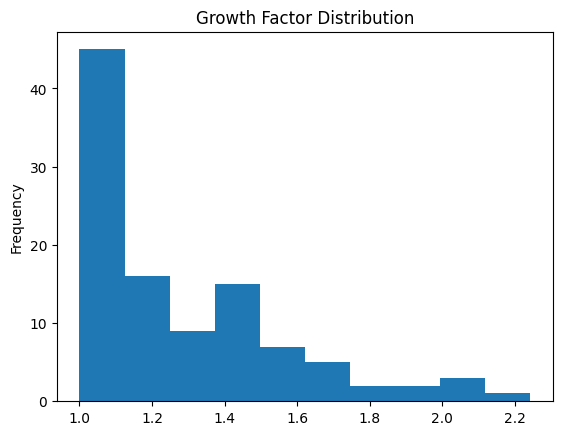

In [ ]:
df1['Growth Factor (CI/SI)'].plot(kind='hist', bins=10, title='Growth Factor Distribution')
plt.show()

In [ ]:
# Count rows where CI > SI
count_greater = df1[df1['Difference (CI - SI)'] > 0].shape[0]
print(f"Number of records where Compound Interest is greater than Simple Interest: {count_greater}")



Number of records where Compound Interest is greater than Simple Interest: 99


In [ ]:
# Group by Principal and get the sum of Simple and Compound Interest
grouped_by_principal = df1.groupby('Principal')[['SimpleInterest', 'CompoundInterest']].sum()
print(grouped_by_principal)



           SimpleInterest  CompoundInterest
Principal                                  
1064.0         830.271608       1209.668506
1161.0         454.625987        525.848177
1189.0         417.220933        494.099133
1391.0        1184.886967       1748.021465
1769.0         796.891427        989.439518
...                   ...               ...
9666.0        1852.911072       1973.829959
9684.0        7999.909759      12034.726817
9792.0        2860.423172       3244.502643
9838.0       10749.724584      18472.475102
9996.0        3345.633858       3914.532428

[94 rows x 2 columns]


                       Principal  TimeYears  InterestRate  SimpleInterest  \
Principal               1.000000   0.036692     -0.042160        0.478035   
TimeYears               0.036692   1.000000     -0.071137        0.624791   
InterestRate           -0.042160  -0.071137      1.000000        0.375140   
SimpleInterest          0.478035   0.624791      0.375140        1.000000   
CompoundInterest        0.379703   0.586123      0.403858        0.977599   
Difference (CI - SI)    0.258274   0.516651      0.414969        0.906236   
Growth Factor (CI/SI)   0.027264   0.746183      0.448955        0.826929   

                       CompoundInterest  Difference (CI - SI)  \
Principal                      0.379703              0.258274   
TimeYears                      0.586123              0.516651   
InterestRate                   0.403858              0.414969   
SimpleInterest                 0.977599              0.906236   
CompoundInterest               1.000000              0.974

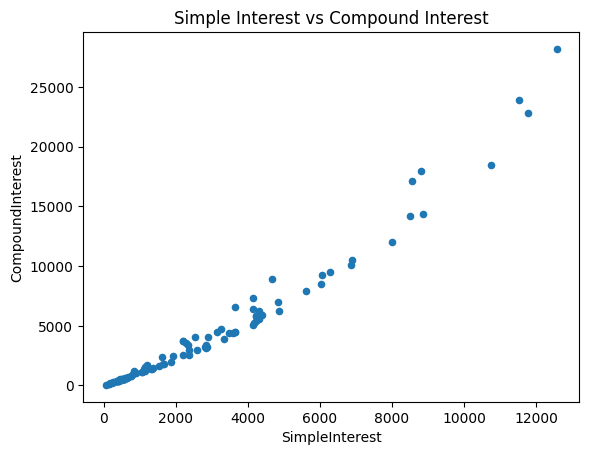

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df1[['Principal', 'TimeYears', 'InterestRate', 'SimpleInterest', 'CompoundInterest', 'Difference (CI - SI)', 'Growth Factor (CI/SI)']].corr()
print(correlation_matrix)



In [ ]:

# Plot a scatter plot between SI and CI
df1.plot(kind='scatter', x='SimpleInterest', y='CompoundInterest', title='Simple Interest vs Compound Interest')
plt.show()